## MNIST + PCA
---
 - Feature 784개 -> 주요 Feature로 압축

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from keras.datasets.mnist import load_data

import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 로딩

In [2]:
(x_train, y_train), (x_test, y_test)=load_data()

In [3]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
x_train=x_train/255.0
x_test=x_test/255.0

In [5]:
x_train=x_train.reshape(-1,784)

In [6]:
pca=PCA()
pca.fit(x_train)

PCA()

In [7]:
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1

print(f'주성분 갯수(차원): {d}')

주성분 갯수(차원): 154


In [8]:
# pca.explained_variance_ratio_

In [9]:
pca=PCA(n_components=d)

In [10]:
pca.fit(x_train)
mnistPCA=pca.transform(x_train)

In [11]:
mnistPCA.shape

(60000, 154)

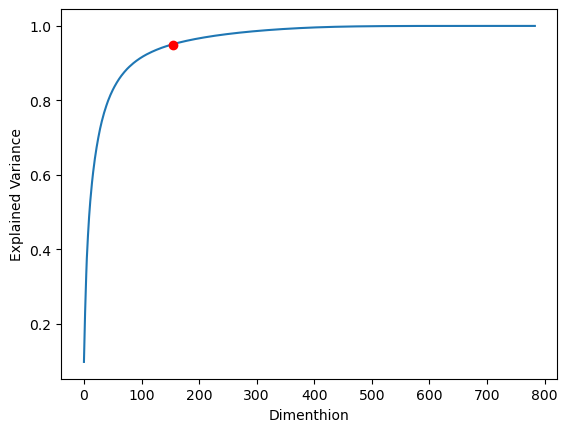

In [12]:
plt.plot(cumsum)
plt.plot(d, 0.95, 'ro')
plt.xlabel('Dimenthion')
plt.ylabel('Explained Variance')
plt.show()

In [13]:
mnistPCA[0].shape

(154,)

In [14]:
re=pca.inverse_transform(mnistPCA)

In [15]:
re.shape

(60000, 784)

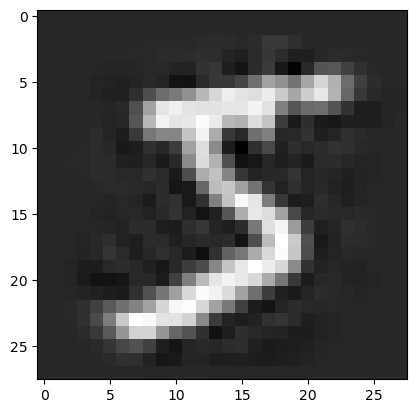

In [16]:
plt.imshow(re[0].reshape(28,28),cmap='gray')
plt.show()

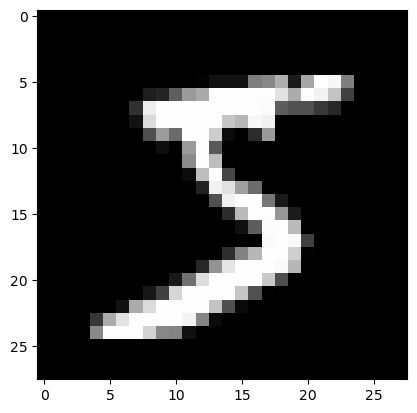

In [19]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.show()